In [2]:
#Dependecies 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np


In [3]:
# Read in the WHR_2023 data
whr_df = pd.read_csv("../Resources/WHR_2023.csv")
whr_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [4]:
#rename columns
whr_df.columns = ["Country", "Year", "Happiness Score", "GDP p/capita", "Social Support",
                  "Healthy Life Expectancy", "Life Choices Freedom", "Generosity",
                  "Corruption Perceptions", "Positive Affect", "Negative Effect"]
whr_df.head()

,Country,Year,Happiness Score,GDP p/capita,Social Support,Healthy Life Expectancy,Life Choices Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Effect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [5]:
# Extract years that we are woprking with 
whr_clean_df = whr_df.loc[whr_df["Year"] >= 2012]
whr_clean_df = whr_clean_df.reset_index(drop=True)
whr_clean_df

,Country,Year,Happiness Score,GDP p/capita,Social Support,Healthy Life Expectancy,Life Choices Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Effect
0,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
1,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.063,0.823,0.547,0.273
2,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.106,0.871,0.492,0.375
3,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.082,0.881,0.491,0.339
4,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.044,0.793,0.501,0.348
...,...,...,...,...,...,...,...,...,...,...,...
1482,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
1483,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
1484,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
1485,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


In [6]:
whr_clean_df = whr_clean_df.dropna(subset=["GDP p/capita"])
whr_clean_df[whr_clean_df["Country"] == "China"]
                            

,Country,Year,Happiness Score,GDP p/capita,Social Support,Healthy Life Expectancy,Life Choices Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Effect
255,China,2012,5.095,9.247,0.788,67.220,0.808,-0.187,NaN,0.689,0.159
256,China,2013,5.241,9.315,0.778,67.480,0.805,-0.161,NaN,0.717,0.142
257,China,2014,5.196,9.380,0.820,67.740,NaN,-0.219,NaN,0.710,0.112
258,China,2015,5.304,9.442,0.794,68.000,NaN,-0.247,NaN,0.667,0.171
259,China,2016,5.325,9.503,0.742,68.125,NaN,-0.230,NaN,0.683,0.146
260,China,2017,5.099,9.564,0.772,68.250,0.878,-0.178,NaN,0.682,0.214
261,China,2018,5.131,9.625,0.788,68.375,0.895,-0.161,NaN,0.722,0.190
262,China,2019,5.144,9.679,0.822,68.500,0.927,-0.176,NaN,0.760,0.147
263,China,2020,5.771,9.699,0.808,68.625,0.891,-0.106,NaN,0.663,0.245
264,China,2021,5.863,9.776,0.856,68.750,0.875,0.022,NaN,0.698,0.240


In [7]:
#group by year the clean df
grouped_clean_df = whr_clean_df.groupby(["Year"]).mean()
grouped_clean_df

/var/folders/6d/5j8s7tx936n18ml2b3pcb67w0000gn/T/ipykernel_39575/2505941987.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_clean_df = whr_clean_df.groupby(["Year"]).mean()


,Happiness Score,GDP p/capita,Social Support,Healthy Life Expectancy,Life Choices Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Effect
Year,,,,,,,,,
2012,5.446379,9.410057,0.808786,63.018235,0.711036,-0.006451,0.760469,0.641093,0.260007
2013,5.393294,9.384713,0.806096,63.126165,0.727548,-0.004075,0.763868,0.654657,0.269956
2014,5.397133,9.367510,0.807529,63.153957,0.735971,0.016180,0.738649,0.656122,0.268636
2015,5.410376,9.391652,0.799779,63.468116,0.750130,0.015679,0.737321,0.658414,0.277193
2016,5.414364,9.389850,0.813921,63.507537,0.765261,-0.002223,0.746984,0.656271,0.283350
2017,5.478514,9.389575,0.806855,63.642958,0.782841,-0.009007,0.728301,0.648910,0.289655
2018,5.498674,9.390922,0.812170,63.890399,0.783843,-0.028759,0.734571,0.652604,0.292914
2019,5.570965,9.453196,0.816895,64.162590,0.794683,-0.023979,0.723267,0.654585,0.286838
2020,5.728658,9.632044,0.822482,65.553571,0.811646,-0.005325,0.725435,0.663478,0.302805


In [8]:
#finding Nan values 
nan_df = whr_clean_df[(whr_clean_df["GDP p/capita"].isna()) | (whr_clean_df["Healthy Life Expectancy"].isna())]
nan_country_year_df = nan_df[["Country", "Year", "GDP p/capita", "Healthy Life Expectancy"]]
sorted_nan_country = nan_country_year_df.sort_values(by="Year", ascending=True)
# print(nan_df.isna().sum())


In [9]:
#generate 10 graphs using for loop and subplots
# define function to loop through 
def plot_yearly_data(df, year, ax):
    df_year = whr_clean_df[whr_clean_df["Year"] == year]
    
    
    x = df_year["Happiness Score"]
    y = df_year["GDP p/capita"]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_value = x * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    ax.scatter(x, y, edgecolor="black")
    ax.plot(x, regress_value, "r-")
    ax.annotate(line_eq, (6, 8), fontsize=12, color="red")
    ax.set_xlabel("Happiness Score")
    ax.set_ylabel("GDP p/capita")
    ax.set_title(f"Happiness Score Vs GDP per/ capital ({year})")
    
    # print(f"Year {year} - The r-value is: {rvalue}")
    # print(f"Year {year} - The r-square value is: {rvalue **2}")



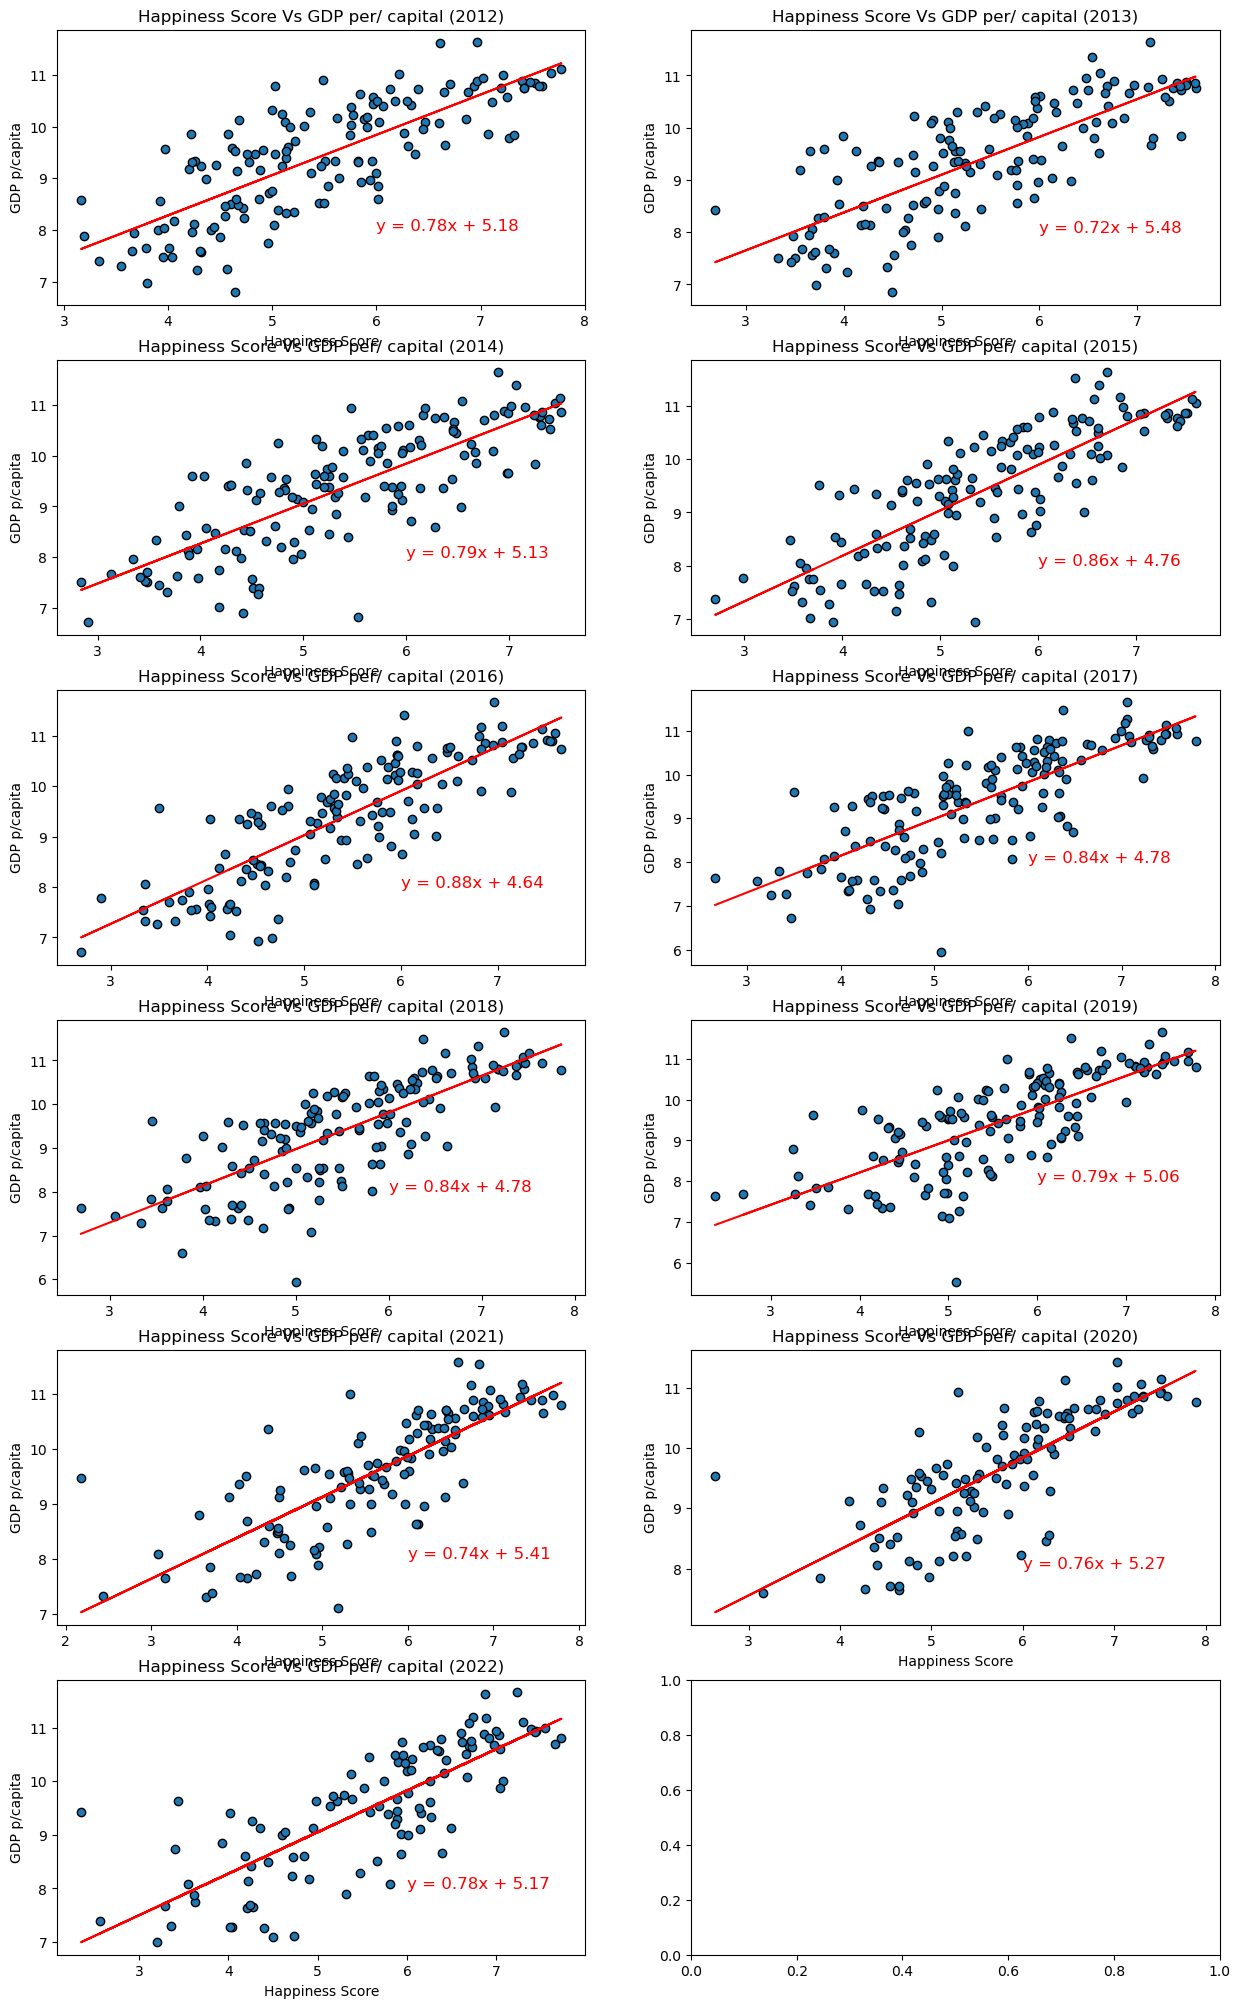

In [10]:
# create list to hold years
years = whr_clean_df["Year"].unique()
#create grid of subplots
fig, axs = plt.subplots(6, 2, figsize=(15, 25))

#flatten
axs = axs.flatten()

#loop through each year 

for i, year in enumerate(years):
    plot_yearly_data(whr_clean_df, year, axs[i])

# plt.tight_layout()
# plt.show


In [11]:
#Sumary statistics for happiness score

summary_happiness_df = whr_clean_df.groupby(["Year"])["Happiness Score"].agg(["mean", "median", "var", "std", "sem"])
summary_happiness_df = pd.DataFrame(summary_happiness_df)
   

In [12]:
# summary stats for GDP p/capita 
summary_GDP_df = whr_clean_df.groupby(["Year"])["GDP p/capita"].agg(["mean", "median", "var", "std", "sem"])
summary_GDP_df = pd.DataFrame(summary_GDP_df)


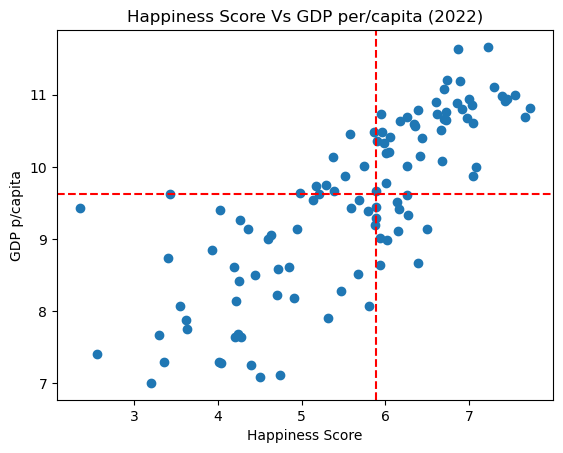

In [13]:
# identifying happiests and least happy countries for each year 
x_axis = whr_clean_df.loc[whr_clean_df["Year"] == 2022]["Happiness Score"]
y_axis = whr_clean_df.loc[whr_clean_df['Year'] == 2022]["GDP p/capita"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Happiness Score")
plt.ylabel("GDP p/capita")
plt.title("Happiness Score Vs GDP per/capita (2022)")
plt.axhline(summary_GDP_df.iloc[10, 1], color="red", linestyle="--")
plt.axvline(summary_happiness_df.iloc[10, 1], color="red", linestyle="--")

plt.show()


The r-value is: 0.7954744182227045
The r-square vale is: 0.6327795500467501


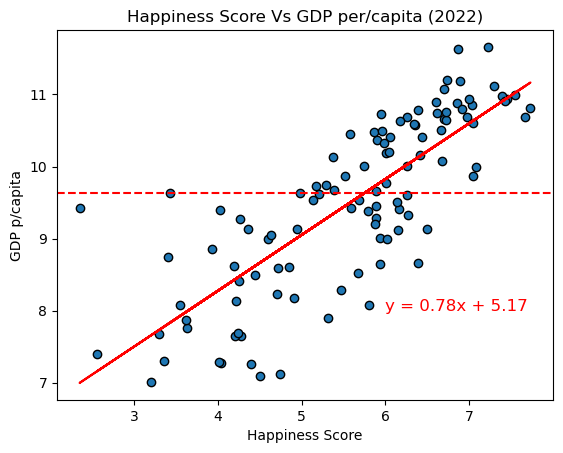

In [14]:
 # add linear regression, but first drop the Nan
df_2022 = whr_clean_df[(whr_clean_df["Year"] == 2022)]   

#define x and y for plotting 
x = df_2022["Happiness Score"]
y = df_2022["GDP p/capita"]

#plot regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (6, 8), fontsize=12, color='red')
plt.axhline(summary_GDP_df.iloc[10, 1], color="red", linestyle="--")
plt.xlabel("Happiness Score")
plt.ylabel("GDP p/capita")
plt.title("Happiness Score Vs GDP per/capita (2022)")    
    
print(f'The r-value is: {rvalue}')
print(f'The r-square vale is: {rvalue **2}')
plt.show()


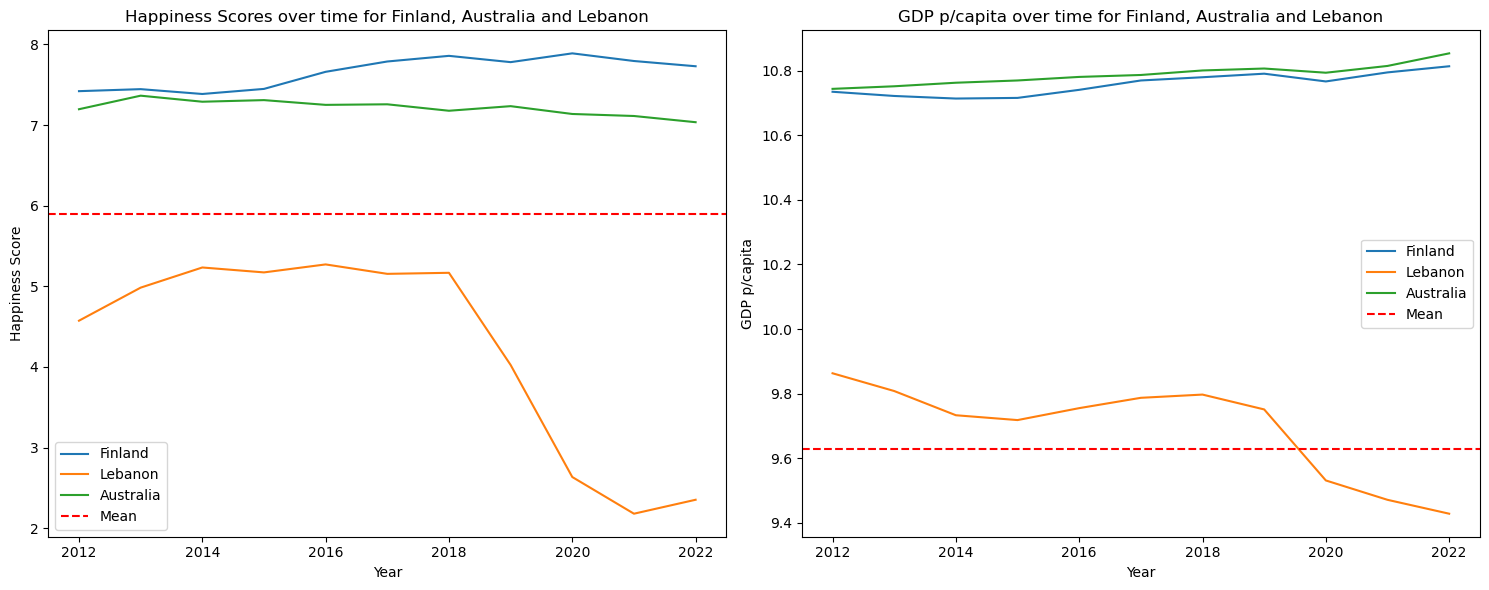

In [15]:
# compare Finland (top performer since 2016) to Lebanon (in the bottom 5 since 2016) 
finland_df = whr_clean_df.loc[whr_clean_df["Country"] == "Finland"] #filter by Finland
lebanon_df = whr_clean_df.loc[whr_clean_df["Country"] == "Lebanon"] #Filter by Lebanon
australia_df = whr_clean_df.loc[whr_clean_df["Country"] == "Australia"] # Filter by Australia

fig, axs = plt.subplots(1, 2, figsize=(15,6))

#create First set of plots for each 
axs[0].plot(finland_df["Year"], finland_df["Happiness Score"], label="Finland")
axs[0].plot(lebanon_df["Year"], lebanon_df["Happiness Score"], label="Lebanon")
axs[0].plot(australia_df["Year"], australia_df["Happiness Score"], label="Australia")

#add lables to first plot etc 
axs[0].set_title("Happiness Scores over time for Finland, Australia and Lebanon")
axs[0].axhline(summary_happiness_df.iloc[10, 1], color="red", linestyle="--", label="Mean")
axs[0].legend(loc="best")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Happiness Score")
                  
#create second plot for GDP

axs[1].plot(finland_df["Year"], finland_df["GDP p/capita"], label="Finland")
axs[1].plot(lebanon_df["Year"], lebanon_df["GDP p/capita"], label="Lebanon")
axs[1].plot(australia_df["Year"], australia_df["GDP p/capita"], label="Australia")

axs[1].set_title("GDP p/capita over time for Finland, Australia and Lebanon")
axs[1].axhline(summary_GDP_df.iloc[10, 1], color="red", linestyle="--", label="Mean")
axs[1].legend(loc="best")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("GDP p/capita")

plt.tight_layout()
plt.show()


In [16]:
#let's find top happiest 5 countries for each year

#create dictionaries to hold values of top and bottom scores for each year
top_df = pd.DataFrame()

#loop through years
for year in range(2016, 2023):
    year_df = whr_clean_df[whr_clean_df["Year"] == year] #filter data for the current year
    top1_df = year_df.nlargest(1, "Happiness Score") #find the top 5 countries with highest happiness scores for all years
    top_df = pd.concat([top1_df, top_df])
   


    
top_df.reset_index(drop=True, inplace=True)





In [17]:
# plot top 5 
# pivot_df = top_df.pivot(index="Year", columns="Country", values="Happiness Score")

# ax = pivot_df.plot(figsize=(10, 8), marker="o")

# plt.title("Fluctuation in Happiness Score for Top 5 Countries (2012-2022)")
# plt.xlabel("Year")
# plt.ylabel("Happiness Score")
# ax.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.grid(True)
# plt.tight_layout(rect=[0, 0.4, 0.85, 1])

# plt.show()



In [18]:
#let's find bottom 5 countries for each year

#create dictionaries to hold values of top and bottom scores for each year
bottom_df = pd.DataFrame()

#loop through years
for year in range(2016, 2023):
    year_df = whr_clean_df[whr_clean_df["Year"] == year] #filter data for the current year
    bottom1_df = year_df.nsmallest(1, "Happiness Score") #find the top 5 countries with highest happiness scores for all years
    bottom_df = pd.concat([bottom1_df, bottom_df])
   


    
bottom_df.reset_index(drop=True, inplace=True)


In [19]:
# #plot bottom countries 
# pivot_bottom_df = bottom_df.pivot(index="Year", columns="Country", values="Happiness Score")

# ax = pivot_bottom_df.plot(figsize=(10, 8), marker="o")

# plt.title("Fluctuation in Happiness Score for Bottom 5 Countries (2012-2022)")
# plt.xlabel("Year")
# plt.ylabel("Happiness Score")
# ax.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.grid(True)
# plt.tight_layout(rect=[0, 0.4, 0.85, 1])

# plt.show()


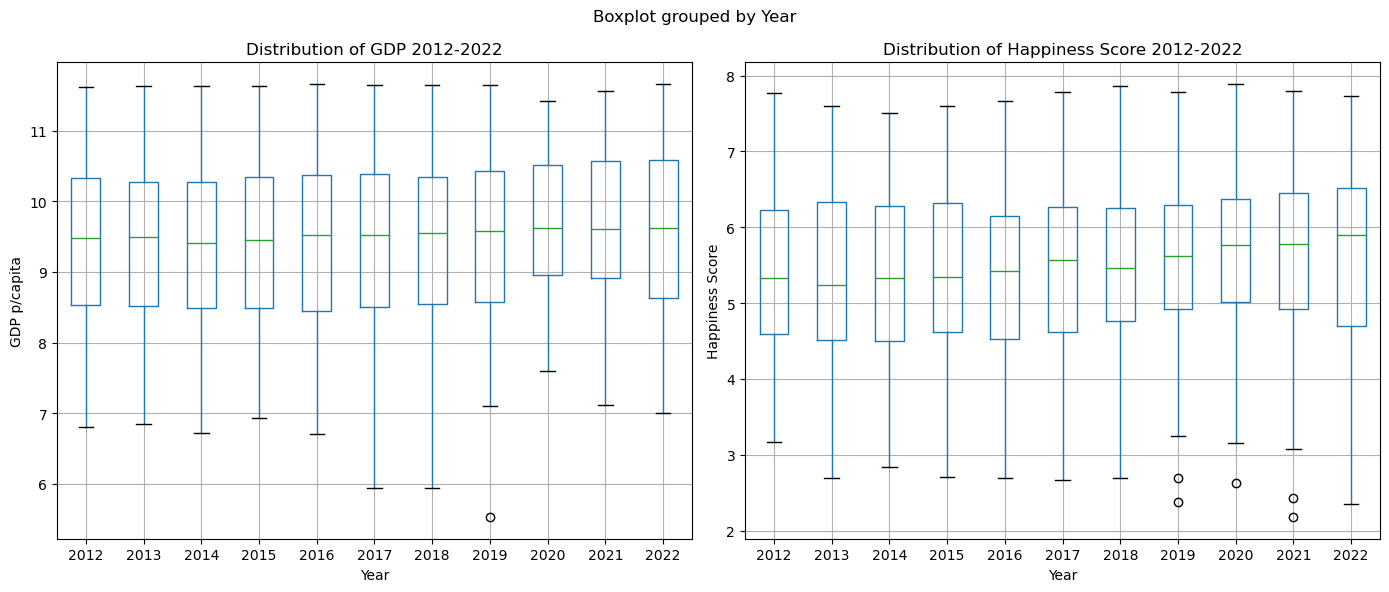

In [20]:
#distribution of GDP in all countries 
# making two fit into one fig

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

whr_clean_df.boxplot(column="GDP p/capita", by="Year", ax=axs[0])
axs[0].set_title("Distribution of GDP 2012-2022")
axs[0].set_ylabel("GDP p/capita")

whr_clean_df.boxplot(column="Happiness Score", by="Year", ax=axs[1])
axs[1].set_title("Distribution of Happiness Score 2012-2022")
axs[1].set_ylabel("Happiness Score")

plt.tight_layout()
plt.show()

In [21]:
#Find the outlier

for year in range(2012, 2023):
    year_GDP_df = whr_clean_df[whr_clean_df["Year"] == year]
    
    #Calculate the IQR and bounds for that year 
    
    quartiles = year_GDP_df["GDP p/capita"].quantile([.25, .5, .75])
    iqr = quartiles[.75] - quartiles[.25]
    u = quartiles[.75] + iqr*1.5
    l = quartiles[.25] - iqr*1.5
    
    #Id outliers
    outliers = year_GDP_df[(whr_clean_df["GDP p/capita"] > u)| (year_GDP_df["GDP p/capita"] < l)]["Country"]
    print(f"Outliers for year {year}:\n{outliers}")



Outliers for year 2012:
Series([], Name: Country, dtype: object)
Outliers for year 2013:
Series([], Name: Country, dtype: object)
Outliers for year 2014:
Series([], Name: Country, dtype: object)
Outliers for year 2015:
Series([], Name: Country, dtype: object)
Outliers for year 2016:
Series([], Name: Country, dtype: object)
Outliers for year 2017:
Series([], Name: Country, dtype: object)
Outliers for year 2018:
Series([], Name: Country, dtype: object)
Outliers for year 2019:
1443    Venezuela
Name: Country, dtype: object
Outliers for year 2020:
Series([], Name: Country, dtype: object)
Outliers for year 2021:
Series([], Name: Country, dtype: object)
Outliers for year 2022:
Series([], Name: Country, dtype: object)


/var/folders/6d/5j8s7tx936n18ml2b3pcb67w0000gn/T/ipykernel_39575/2594049892.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = year_GDP_df[(whr_clean_df["GDP p/capita"] > u)| (year_GDP_df["GDP p/capita"] < l)]["Country"]
/var/folders/6d/5j8s7tx936n18ml2b3pcb67w0000gn/T/ipykernel_39575/2594049892.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = year_GDP_df[(whr_clean_df["GDP p/capita"] > u)| (year_GDP_df["GDP p/capita"] < l)]["Country"]
/var/folders/6d/5j8s7tx936n18ml2b3pcb67w0000gn/T/ipykernel_39575/2594049892.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = year_GDP_df[(whr_clean_df["GDP p/capita"] > u)| (year_GDP_df["GDP p/capita"] < l)]["Country"]
/var/folders/6d/5j8s7tx936n18ml2b3pcb67w0000gn/T/ipykernel_39575/2594049892.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = year_GDP_df[(whr_clean_df["GDP

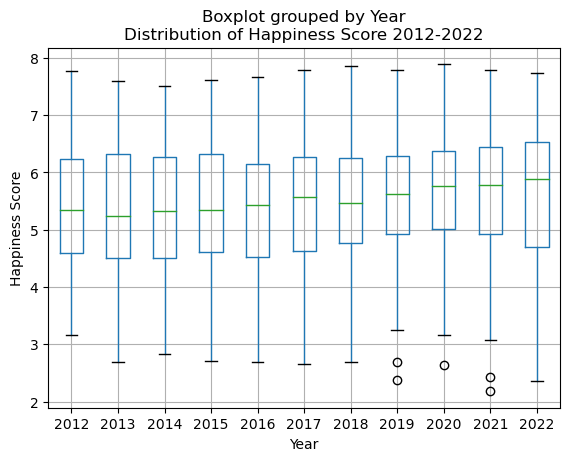

In [22]:
#distribution of Happiness Score in all countries 2012-2022

whr_clean_df.boxplot(column="Happiness Score", by="Year")
plt.title("Distribution of Happiness Score 2012-2022")
plt.ylabel("Happiness Score")
plt.show()


In [23]:
#find the outliers for Happiness Score 
for year in range(2012, 2023):
    year_happy_df = whr_clean_df[whr_clean_df["Year"] == year]
    
    #Calculate the IQR and bounds for that year 
    
    quartiles =  year_happy_df["Happiness Score"].quantile([.25, .5, .75])
    iqr = quartiles[.75] - quartiles[.25]
    u = quartiles[.75] + iqr*1.5
    l = quartiles[.25] - iqr*1.5
    
    #Id outliers
    outliers = year_happy_df[(whr_clean_df["Happiness Score"] > u)| (year_happy_df["Happiness Score"] < l)]["Country"]
    print(f"Outliers for year {year}:\n{outliers}")

Outliers for year 2012:
Series([], Name: Country, dtype: object)
Outliers for year 2013:
Series([], Name: Country, dtype: object)
Outliers for year 2014:
Series([], Name: Country, dtype: object)
Outliers for year 2015:
Series([], Name: Country, dtype: object)
Outliers for year 2016:
Series([], Name: Country, dtype: object)
Outliers for year 2017:
Series([], Name: Country, dtype: object)
Outliers for year 2018:
Series([], Name: Country, dtype: object)
Outliers for year 2019:
7       Afghanistan
1483       Zimbabwe
Name: Country, dtype: object
Outliers for year 2020:
754    Lebanon
Name: Country, dtype: object
Outliers for year 2021:
8      Afghanistan
755        Lebanon
Name: Country, dtype: object
Outliers for year 2022:
Series([], Name: Country, dtype: object)


/var/folders/6d/5j8s7tx936n18ml2b3pcb67w0000gn/T/ipykernel_39575/3643668718.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = year_happy_df[(whr_clean_df["Happiness Score"] > u)| (year_happy_df["Happiness Score"] < l)]["Country"]
/var/folders/6d/5j8s7tx936n18ml2b3pcb67w0000gn/T/ipykernel_39575/3643668718.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = year_happy_df[(whr_clean_df["Happiness Score"] > u)| (year_happy_df["Happiness Score"] < l)]["Country"]
/var/folders/6d/5j8s7tx936n18ml2b3pcb67w0000gn/T/ipykernel_39575/3643668718.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = year_happy_df[(whr_clean_df["Happiness Score"] > u)| (year_happy_df["Happiness Score"] < l)]["Country"]
/var/folders/6d/5j8s7tx936n18ml2b3pcb67w0000gn/T/ipykernel_39575/3643668718.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = 

In [24]:
#let's find top richest 20 countries for each year

#create data frame to hold values
topGDP_df = pd.DataFrame()
bottomGDP_df = pd.DataFrame()


#loop through years
for year in range(2012, 2023):
    year_df = whr_clean_df[whr_clean_df["Year"] == year] #filter data for the current year
    top20_df = year_df.nlargest(20, "GDP p/capita") #find the top 20 countries with highest happiness scores for all years
    topGDP_df = pd.concat([top20_df, topGDP_df])
    bottom20_df = year_df.nsmallest(20, "GDP p/capita")
    bottomGDP_df = pd.concat([bottom20_df, bottomGDP_df])
    combined_top_bottom = pd.concat([topGDP_df, bottomGDP_df])
   
    
combined_top_bottom.reset_index(drop=True, inplace=True)
topGDP_df

,Country,Year,Happiness Score,GDP p/capita,Social Support,Healthy Life Expectancy,Life Choices Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Effect
792,Luxembourg,2022,7.228,11.660,0.878,71.675,0.915,0.024,0.345,0.718,0.218
616,Ireland,2022,6.870,11.625,0.906,71.400,0.895,0.140,0.358,0.738,0.234
1391,United Arab Emirates,2022,6.738,11.202,0.798,66.450,0.932,0.171,NaN,0.715,0.242
1274,Switzerland,2022,6.884,11.184,0.881,73.100,0.848,0.128,0.235,0.710,0.180
1017,Norway,2022,7.295,11.111,0.927,71.550,0.939,0.185,0.314,0.759,0.211
...,...,...,...,...,...,...,...,...,...,...,...
110,Belgium,2012,6.935,10.783,0.927,69.520,0.855,-0.054,0.758,0.718,0.238
83,Bahrain,2012,5.027,10.775,0.911,65.480,0.682,NaN,0.438,0.559,0.381
53,Australia,2012,7.196,10.744,0.945,70.360,0.935,0.270,0.368,0.728,0.214
222,Canada,2012,7.415,10.739,0.948,70.920,0.918,0.286,0.466,0.776,0.229


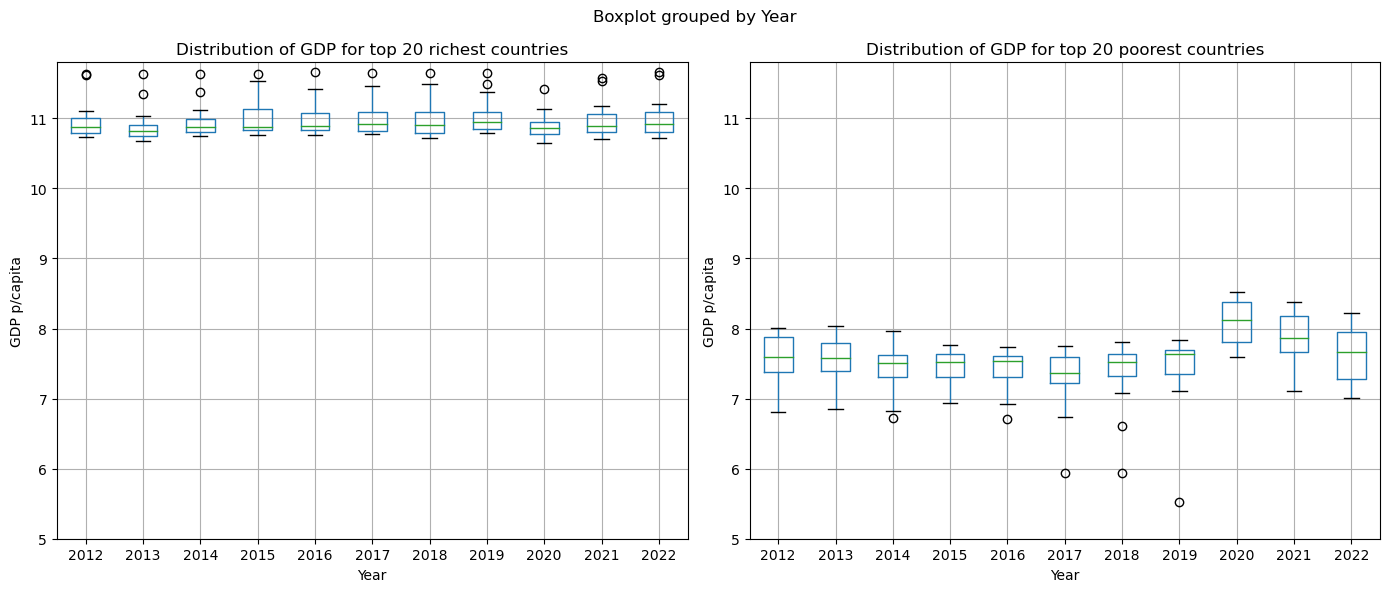

In [25]:
#GDP p/capita for top 20 richest countries in the world 

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

topGDP_df.boxplot(column="GDP p/capita", by="Year", ax=axs[0])
axs[0].set_title("Distribution of GDP for top 20 richest countries")
axs[0]. set_ylabel("GDP p/capita")

bottomGDP_df.boxplot(column="GDP p/capita", by="Year", ax=axs[1])
axs[1].set_title("Distribution of GDP for top 20 poorest countries")
axs[1]. set_ylabel("GDP p/capita")

axs[0].set_ylim(5, 11.8)
axs[1].set_ylim(5, 11.8)


plt.tight_layout()
plt.show()

#-----------------------------------------
# topGDP_df.boxplot(column="GDP p/capita", by="Year")
# bottomGDP_df.boxplot(column="GDP p/capita", by="Year")
# plt.title("Distribution of GDP for top 20 richest and poorest countries")
# plt.ylabel("GDP p/capita")


# plt.show()

#------------------------------------------


In [37]:
#create summary stats for top countries - GDP p/capita

summary_top = topGDP_df.groupby(["Year"])[["Happiness Score", "GDP p/capita", "Healthy Life Expectancy"]].mean()
summary_top

,Happiness Score,GDP p/capita,Healthy Life Expectancy
Year,,,
2012,7.00905,10.94295,69.493684
2013,7.05595,10.88805,69.470526
2014,6.87465,10.94560,69.607778
2015,6.95505,11.00050,70.010526
2016,6.91015,10.98455,70.286111
2017,6.97045,10.99795,70.361111
2018,7.09225,10.98310,70.342105
2019,7.11480,11.01950,70.561111
2020,6.95885,10.88850,70.315789


In [36]:
#create summary stats for bottom countries - GDP p/capita

summary_bottom = bottomGDP_df.groupby(["Year"])[["Happiness Score", "GDP p/capita", "Healthy Life Expectancy"]].mean()
summary_bottom

,Happiness Score,GDP p/capita,Healthy Life Expectancy
Year,,,
2012,4.05360,7.57265,53.35100
2013,4.00225,7.57215,53.50500
2014,3.95360,7.41945,53.50800
2015,3.98855,7.43710,53.58000
2016,3.93820,7.40770,54.16125
2017,4.05170,7.32045,54.77250
2018,4.20510,7.38315,55.57500
2019,4.24890,7.43695,55.37500
2020,4.77135,8.09125,58.02625


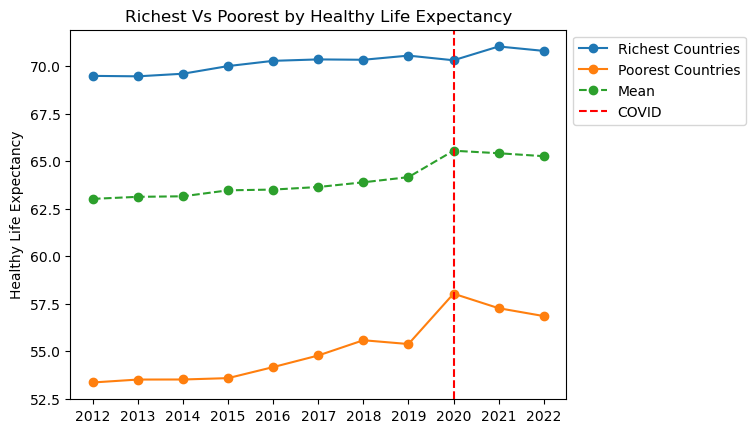

In [42]:
#plot healthy life expectancy for top and bottom countries 
plt.plot(summary_top.index, summary_top["Healthy Life Expectancy"], marker="o")
plt.plot(summary_bottom.index, summary_bottom["Healthy Life Expectancy"], marker="o")
plt.plot(grouped_clean_df.index, grouped_clean_df["Healthy Life Expectancy"], marker="o", linestyle="--")
plt.title("Richest Vs Poorest by Healthy Life Expectancy") 
plt.ylabel("Healthy Life Expectancy")
plt.axvline(2020, color="red", linestyle="--", label="COVID")
plt.legend(["Richest Countries", "Poorest Countries", "Mean", "COVID"], loc="upper left", bbox_to_anchor=(1, 1))

plt.xticks(summary_top.index)

plt.show()

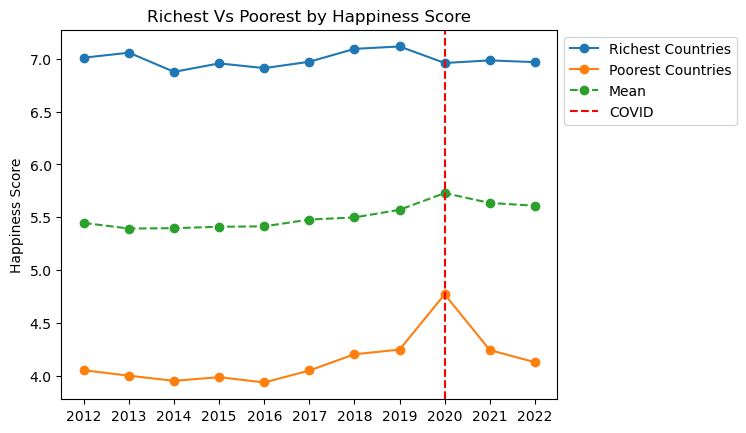

In [41]:
#plot the happiness score and the gdp trend 

# fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# axs[0].plot(summary_top.index, summary_top["Happiness Score"])
# axs[0].set_title("Average Happiness Score of Top GDP p/ capita Countries")
# axs[0].set_ylabel("Happiness Score")
# axs[0].set_xlabel("Years")

# axs[1].plot(summary_bottom.index, summary_bottom["Happiness Score"])
# axs[1].set_title("Average Happiness Score of Lowest GDP p/ capita Countries")
# axs[1].set_ylabel("Happiness Score")
# axs[1].set_xlabel("Years")


# plt.show()

plt.plot(summary_top.index, summary_top["Happiness Score"], marker="o")
plt.plot(summary_bottom.index, summary_bottom["Happiness Score"], marker="o")
plt.plot(grouped_clean_df.index, grouped_clean_df["Happiness Score"], marker="o", linestyle="--")
plt.title("Richest Vs Poorest by Happiness Score") 
plt.ylabel("Happiness Score")
plt.axvline(2020, color="red", linestyle="--", label="COVID")
plt.legend(["Richest Countries", "Poorest Countries", "Mean", "COVID"], loc="upper left", bbox_to_anchor=(1, 1))

plt.xticks(summary_top.index)

plt.show()

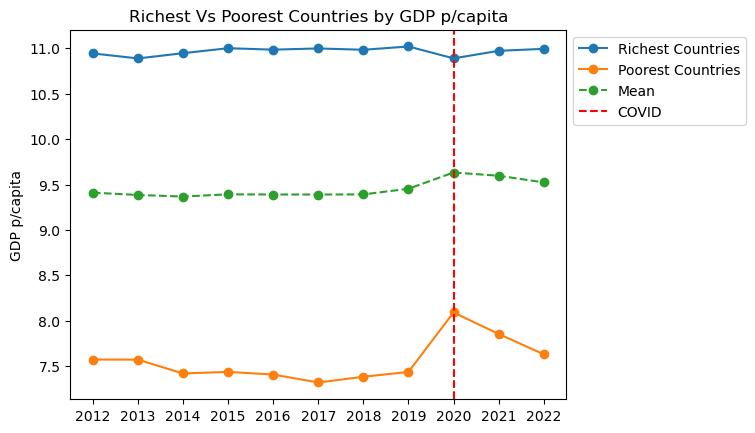

In [43]:
#plot the happiness score and the gdp trend 

# fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# axs[0].plot(summary_top.index, summary_top["GDP p/capita"])
# axs[0].set_title("Average GDP p/ capita for top 20 Countries")
# axs[0].set_ylabel("GDP p/capita")
# axs[0].set_xlabel("Years")

# axs[1].plot(summary_bottom.index, summary_bottom["Happiness Score"])
# axs[1].set_title("Average Happiness Score of Lowest GDP p/ capita Countries")
# axs[1].set_ylabel("Happiness Score")
# axs[1].set_xlabel("Years")

# plt.show()

plt.plot(summary_top.index, summary_top["GDP p/capita"], marker="o")
plt.plot(summary_bottom.index, summary_bottom["GDP p/capita"], marker="o")
plt.plot(grouped_clean_df.index, grouped_clean_df["GDP p/capita"], marker="o", linestyle="--")
plt.title("Richest Vs Poorest Countries by GDP p/capita") 
plt.ylabel("GDP p/capita")
plt.axvline(2020, color="red", linestyle="--", label="COVID")
plt.legend(["Richest Countries", "Poorest Countries", "Mean", "COVID"], loc="upper left", bbox_to_anchor=(1, 1))

plt.xticks(summary_top.index)

plt.show()

In [30]:



for year in range(2016, 2023):
    year_GDP_df = topGDP_df[topGDP_df["Year"] == year]
    
    #Calculate the IQR and bounds for that year 
    
    quartiles = year_GDP_df["GDP p/capita"].quantile([.25, .5, .75])
    iqr = quartiles[.75] - quartiles[.25]
    u = quartiles[.75] + iqr*1.5
    l = quartiles[.25] - iqr*1.5
    
    #Id outliers
    outliers = year_GDP_df[(year_GDP_df["GDP p/capita"] > u)| (year_GDP_df["GDP p/capita"] < l)][["Country", "Happiness Score", "GDP p/capita"]]
    
    # if not outliers.empty:
    print(f"Outliers for year {year}:\n{outliers}")


Outliers for year 2016:
        Country  Happiness Score  GDP p/capita
788  Luxembourg            6.967        11.664
Outliers for year 2017:
        Country  Happiness Score  GDP p/capita
789  Luxembourg            7.061        11.653
Outliers for year 2018:
        Country  Happiness Score  GDP p/capita
790  Luxembourg            7.243        11.645
Outliers for year 2019:
         Country  Happiness Score  GDP p/capita
791   Luxembourg            7.404        11.649
1170   Singapore            6.378        11.496
Outliers for year 2020:
     Country  Happiness Score  GDP p/capita
614  Ireland            7.035         11.42
Outliers for year 2021:
        Country  Happiness Score  GDP p/capita
1171  Singapore            6.587        11.571
615     Ireland            6.828        11.538
Outliers for year 2022:
        Country  Happiness Score  GDP p/capita
792  Luxembourg            7.228        11.660
616     Ireland            6.870        11.625


The r-value is: 0.20701929434683222
The r-square vale is: 0.04285698823186036


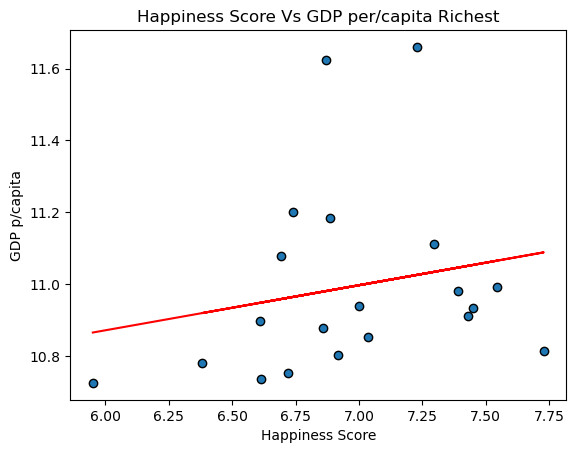

In [31]:
#is GDP related to greater happiness fo top 20 countries? 

topGDP_2022 = topGDP_df[topGDP_df["Year"] == 2022]

x = topGDP_2022["Happiness Score"]
y = topGDP_2022["GDP p/capita"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (6, 8), fontsize=12, color='red')
plt.xlabel("Happiness Score")
plt.ylabel("GDP p/capita")
plt.title("Happiness Score Vs GDP per/capita Richest")    

print(f'The r-value is: {rvalue}')
print(f'The r-square vale is: {rvalue **2}')
plt.show()

The r-value is: 0.3589043057964429
The r-square vale is: 0.12881230071922659


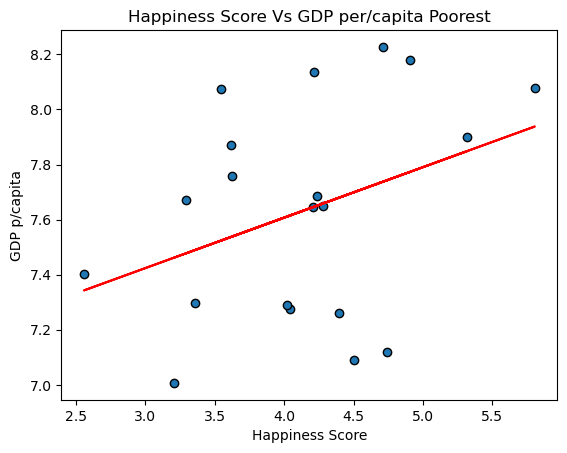

In [32]:
bottomGDP_2022 = bottomGDP_df[bottomGDP_df["Year"] == 2022]

x = bottomGDP_2022["Happiness Score"]
y = bottomGDP_2022["GDP p/capita"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (6, 8), fontsize=12, color='red')
plt.xlabel("Happiness Score")
plt.ylabel("GDP p/capita")
plt.title("Happiness Score Vs GDP per/capita Poorest")    

print(f'The r-value is: {rvalue}')
print(f'The r-square vale is: {rvalue **2}')
plt.show()

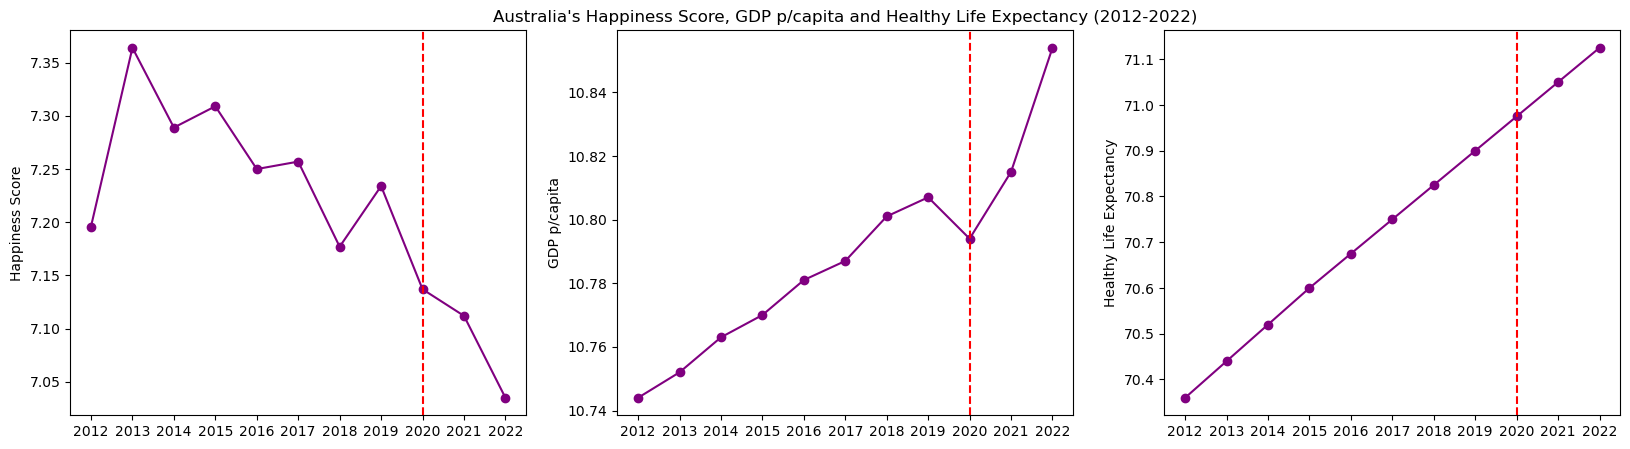

In [35]:
# filter by Australia
Aus_df = whr_clean_df.loc[whr_clean_df["Country"] == "Australia"]

fig, axs = plt.subplots(1, 3, figsize=(20, 5)) 

#plot hapiness score for australia

axs[0].plot(Aus_df["Year"], Aus_df["Happiness Score"], marker="o", color="purple")
axs[0].set_xticks(Aus_df["Year"])
axs[0].axvline(2020, linestyle="--", color="red")
axs[0].set_ylabel("Happiness Score")


#plot GDP score for australia
axs[1].plot(Aus_df["Year"], Aus_df["GDP p/capita"], marker="o", color="purple")
axs[1].set_xticks(Aus_df["Year"])
axs[1].set_title("Australia's Happiness Score, GDP p/capita and Healthy Life Expectancy (2012-2022)")
axs[1].axvline(2020, linestyle="--", color="red")
axs[1].set_ylabel("GDP p/capita")

#plot Healthy Life Expectancy score for australia
axs[2].plot(Aus_df["Year"], Aus_df["Healthy Life Expectancy"], marker="o", color="purple")
axs[2].set_xticks(Aus_df["Year"])
axs[2].axvline(2020, linestyle="--", color="red")
axs[2].set_ylabel("Healthy Life Expectancy")

plt.savefig("../Images/australia_combined.png")

plt.show()

In [126]:
#group by year the clean df
grouped_clean_df = whr_clean_df.groupby(["Year"]).mean()
grouped_clean_df

/var/folders/6d/5j8s7tx936n18ml2b3pcb67w0000gn/T/ipykernel_35477/2505941987.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_clean_df = whr_clean_df.groupby(["Year"]).mean()


,Happiness Score,GDP p/capita,Social Support,Healthy Life Expectancy,Life Choices Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Effect
Year,,,,,,,,,
2012,5.446379,9.410057,0.808786,63.018235,0.711036,-0.006451,0.760469,0.641093,0.260007
2013,5.393294,9.384713,0.806096,63.126165,0.727548,-0.004075,0.763868,0.654657,0.269956
2014,5.397133,9.367510,0.807529,63.153957,0.735971,0.016180,0.738649,0.656122,0.268636
2015,5.410376,9.391652,0.799779,63.468116,0.750130,0.015679,0.737321,0.658414,0.277193
2016,5.414364,9.389850,0.813921,63.507537,0.765261,-0.002223,0.746984,0.656271,0.283350
2017,5.478514,9.389575,0.806855,63.642958,0.782841,-0.009007,0.728301,0.648910,0.289655
2018,5.498674,9.390922,0.812170,63.890399,0.783843,-0.028759,0.734571,0.652604,0.292914
2019,5.570965,9.453196,0.816895,64.162590,0.794683,-0.023979,0.723267,0.654585,0.286838
2020,5.728658,9.632044,0.822482,65.553571,0.811646,-0.005325,0.725435,0.663478,0.302805


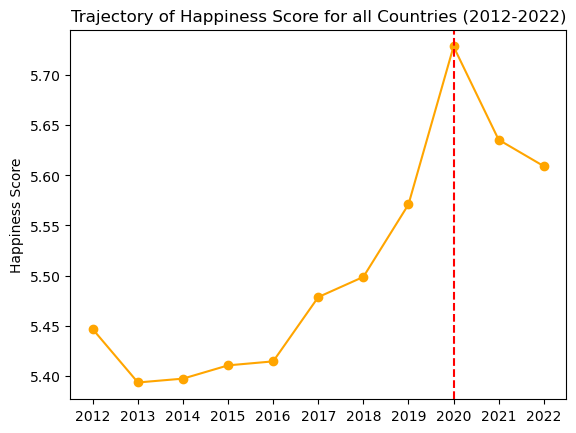

In [223]:
#plot hapiness score over time 2012-2022

plt.plot(grouped_clean_df.index, grouped_clean_df["Happiness Score"], marker="o", color="orange")
plt.ylabel("Happiness Score")
plt.title("Trajectory of Happiness Score for all Countries (2012-2022)")
plt.axvline(2020, color="red", linestyle="--", label="COVID")
plt.xticks(grouped_clean_df.index)
plt.savefig("../Images/happy_score_all_countries.png")

plt.show()

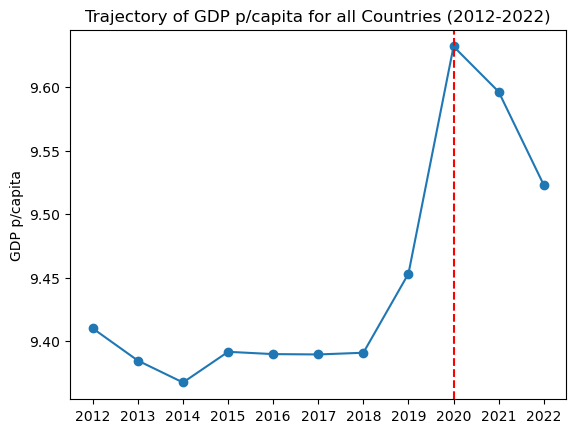

In [221]:
#plot GDP over time 2012-2022

plt.plot(grouped_clean_df.index, grouped_clean_df["GDP p/capita"], marker="o")
plt.ylabel("GDP p/capita")
plt.title("Trajectory of GDP p/capita for all Countries (2012-2022)")
plt.axvline(2020, color="red", linestyle="--", label="COVID")
plt.xticks(grouped_clean_df.index)
plt.savefig("../Images/GDP_all_countries.png")

plt.show()

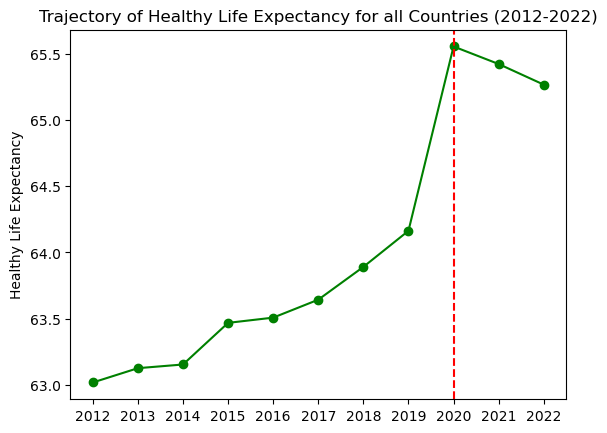

In [237]:
#plot Healthy Life Expectancy score over time 2012-2022
x_axis = grouped_clean_df.index
y_axis = grouped_clean_df["Healthy Life Expectancy"]
plt.plot(x_axis, y_axis, marker="o", color="green")
plt.axvline(2020, color="red", linestyle="--", label="COVID")
plt.xticks(grouped_clean_df.index)
plt.ylabel("Healthy Life Expectancy")
plt.title("Trajectory of Healthy Life Expectancy for all Countries (2012-2022)")
plt.savefig("../Images/healthy_life_expc_all_countries.png")
plt.show()

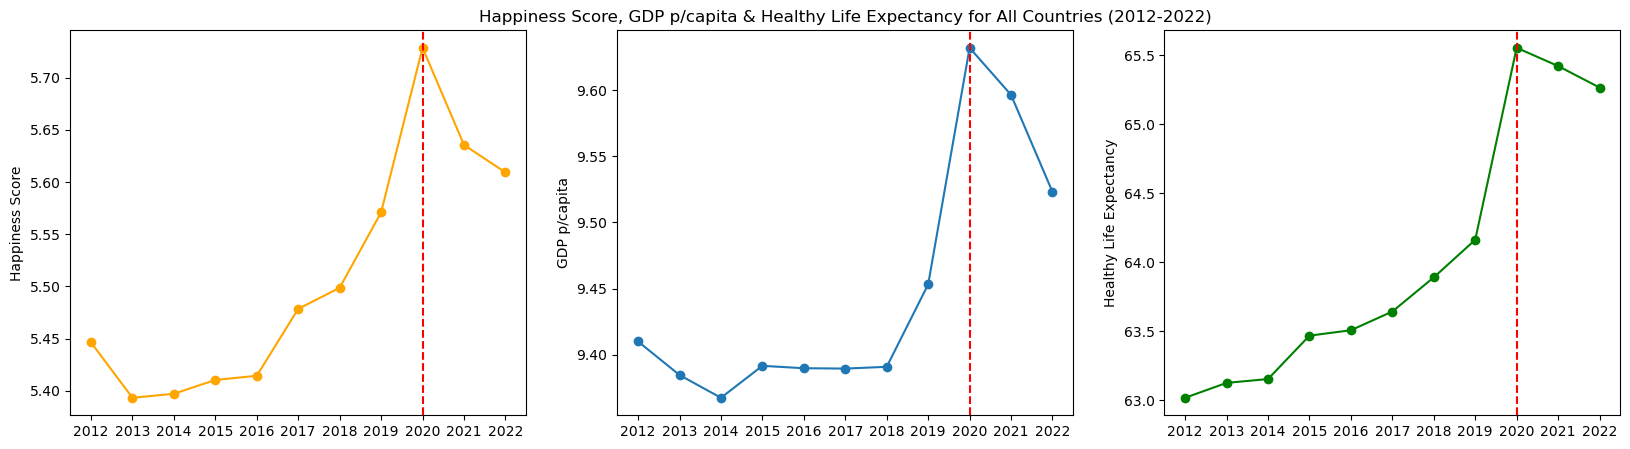

In [238]:
# fit all three previous graphs in one 

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

#first graph
axs[0].plot(grouped_clean_df.index, grouped_clean_df["Happiness Score"], marker="o", color="orange")
axs[0].set_ylabel("Happiness Score")

axs[0].axvline(2020, color="red", linestyle="--", label="COVID")
axs[0].set_xticks(grouped_clean_df.index)

#second graph
axs[1].plot(grouped_clean_df.index, grouped_clean_df["GDP p/capita"], marker="o")
axs[1].set_ylabel("GDP p/capita")
axs[1].set_title("Happiness Score, GDP p/capita & Healthy Life Expectancy for All Countries (2012-2022)")
axs[1].axvline(2020, color="red", linestyle="--", label="COVID")
axs[1].set_xticks(grouped_clean_df.index)

#third graph
x_axis = grouped_clean_df.index
y_axis = grouped_clean_df["Healthy Life Expectancy"]
axs[2].plot(x_axis, y_axis, marker="o", color="green")
axs[2].axvline(2020, color="red", linestyle="--", label="COVID")
axs[2].set_xticks(grouped_clean_df.index)
axs[2].set_ylabel("Healthy Life Expectancy")

plt.savefig("../Images/combined_all_countries.png")

plt.show()

In [39]:
# #plot GDP score over time 2016-2022
# x_axis = grouped_clean_df.index
# y_axis = grouped_clean_df["GDP p/capita"]
# plt.plot(x_axis, y_axis)
# plt.plot(grouped_clean_df.index, grouped_clean_df["Happiness Score"])
# plt.xticks(grouped_clean_df.index)
# plt.show()

The r-value is: 0.6993324781141869
The r-square vale is: 0.48906591494532964


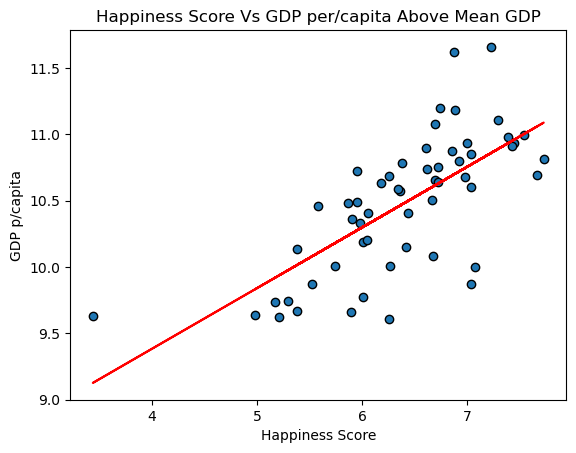

In [212]:
#identify trends for countries above GDP average and below 
above_mean = whr_clean_df[(whr_clean_df["Year"] == 2022) &
                         (whr_clean_df["GDP p/capita"] >=  9.608667)]

x = above_mean["Happiness Score"]
y = above_mean["GDP p/capita"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (6, 8), fontsize=12, color='red')
plt.xlabel("Happiness Score")
plt.ylabel("GDP p/capita")
plt.title("Happiness Score Vs GDP per/capita Above Mean GDP")    

print(f'The r-value is: {rvalue}')
print(f'The r-square vale is: {rvalue **2}')
plt.show()

The r-value is: 0.5266038487430735
The r-square vale is: 0.27731161351101785


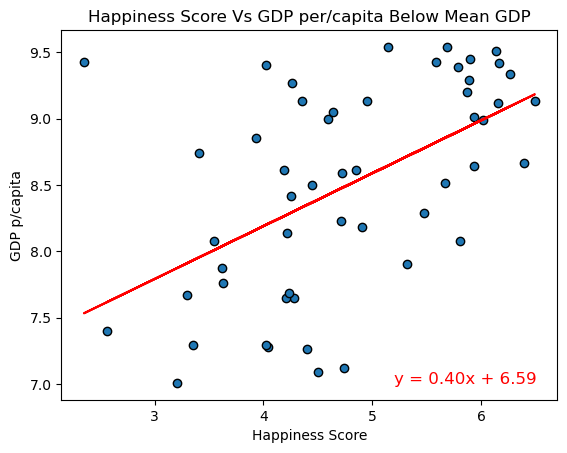

In [213]:
#identify trends for countries below GDP average and below 
below_mean = whr_clean_df[(whr_clean_df["Year"] == 2022) &
                         (whr_clean_df["GDP p/capita"] < 9.608667)]

x = below_mean["Happiness Score"]
y = below_mean["GDP p/capita"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (5.2, 7), fontsize=12, color='red')
plt.xlabel("Happiness Score")
plt.ylabel("GDP p/capita")
plt.title("Happiness Score Vs GDP per/capita Below Mean GDP")    

print(f'The r-value is: {rvalue}')
print(f'The r-square vale is: {rvalue **2}')
plt.show()

In [136]:
#create a data frame filter only countries with the highest COVID deaths/ 100K POP.

top_covid_countries = ["Peru", "Bulgaria", "Hungary", "Bosnia and Herzegovina", 
                       "North Macedonia", "Montenegro", "Croatia", "Georgia", 
                       "Czechia", "Slovakia", "Poland", "Italy", "Lithuania", "Romania", 
                       "United States", "Slovenia", "Chile", "Greece", "Latvia", "Brazil", "United Kingdom"]

                         
                             
#create data frame to hold values

top_covid_df = pd.DataFrame()


#loop through top covid countries 
for country in top_covid_countries:
    top_covid = whr_clean_df[whr_clean_df["Country"] == country] #filter data coutry in list
    top_covid_df = pd.concat([top_covid, top_covid_df])

#create summary stats for top countries for ploting
summary_top_covid = top_covid_df.groupby(["Year"])[["Happiness Score", "GDP p/capita"]].mean()

summary_top_covid

,Happiness Score,GDP p/capita
Year,,
2012,5.618667,10.042381
2013,5.675619,10.057143
2014,5.763810,10.079143
2015,5.721333,10.106143
2016,5.815571,10.128048
2017,5.931714,10.161429
2018,6.016476,10.196571
2019,6.012350,10.205800
2020,6.111333,10.164286


In [137]:
#create a data frame filter only countries with the highest COVID deaths/ 100K POP.

bottom_covid_countries = ["Uzbekistan", "Ghana", "Nicaragua", "Mali", "Guinea",
                "Togo", "Ivory Coast", "Burkina Faso", "Congo (Kinshasa)", 
                "Sierra Leone", "Nigeria", "Tanzania", "Benin", 
                "Tajikistan", "Niger", "Chad", "Madagascar", "Liberia", "Ethiopia", "China"]

#create data frame to hold values

bottom_covid_df = pd.DataFrame()



#loop through bottom covid countries
for country in bottom_covid_countries:
    bottom_covid = whr_clean_df[whr_clean_df["Country"] == country] #filter data by country in list
    bottom_covid_df = pd.concat([bottom_covid, bottom_covid_df])

#create summary stats for bottom covid countries for ploting
summary_bottom_covid = bottom_covid_df.groupby(["Year"])[["Happiness Score", "GDP p/capita"]].mean()

summary_bottom_covid


,Happiness Score,GDP p/capita
Year,,
2012,4.456938,7.823313
2013,4.342944,7.863722
2014,4.194316,7.814474
2015,4.346100,7.861450
2016,4.403050,7.879600
2017,4.837450,7.904450
2018,4.873684,7.977263
2019,4.792316,7.998421
2020,5.075077,8.289000


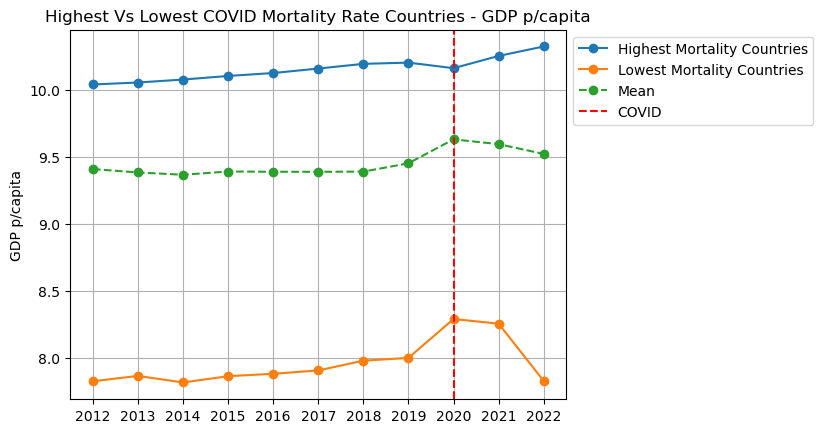

In [189]:
#plot in same plot the trajectory of Happiness Index for top and bottom covid countries 

plt.plot(summary_top_covid.index, summary_top_covid["GDP p/capita"], marker="o")
plt.plot(summary_bottom_covid.index, summary_bottom_covid["GDP p/capita"], marker="o")
plt.plot(grouped_clean_df.index, grouped_clean_df["GDP p/capita"], marker="o", linestyle="--")
plt.title("Highest Vs Lowest COVID Mortality Rate Countries - GDP p/capita") 
plt.ylabel("GDP p/capita")
plt.axvline(2020, color="red", linestyle="--", label="COVID")
plt.legend(["Highest Mortality Countries", "Lowest Mortality Countries", "Mean", "COVID"], loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(summary_top_covid.index)

plt.savefig("../Images/high_low_mortality_GDP.png")
plt.show()

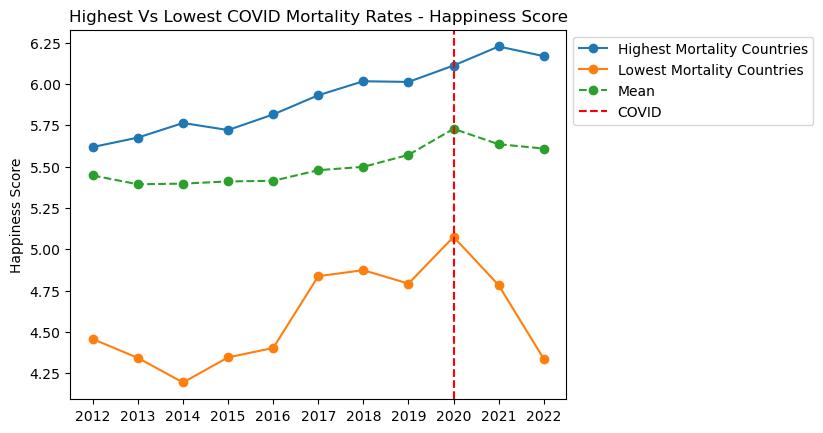

In [186]:
#plot in same plot the trajectory of Happiness Index for top and bottom covid countries 

plt.plot(summary_top_covid.index, summary_top_covid["Happiness Score"], marker="o")
plt.plot(summary_bottom_covid.index, summary_bottom_covid["Happiness Score"], marker="o")
plt.plot(grouped_clean_df.index, grouped_clean_df["Happiness Score"], marker="o", linestyle="--")
plt.title("Highest Vs Lowest COVID Mortality Rates - Happiness Score") 
plt.ylabel("Happiness Score")
plt.axvline(2020, color="red", linestyle="--", label="COVID")
plt.legend(["Highest Mortality Countries", "Lowest Mortality Countries", "Mean", "COVID"], loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(summary_top_covid.index)

plt.savefig("../Images/high_low_mortality_happy_score.png")

plt.show()

In [177]:
#create separate data frames for countries that sit above and below the GDP mean 

above_mean_gdp = pd.DataFrame()
below_mean_gdp = pd.DataFrame()


#loop through bottom covid countries
for year in range (2012, 2023):
    mean_gdp_for_year = grouped_clean_df.loc[year, "GDP p/capita"]
    above_mean = whr_clean_df[(whr_clean_df["Year"] == year) &
                              (whr_clean_df["GDP p/capita"] >= mean_gdp_for_year)]
    below_mean = whr_clean_df[(whr_clean_df["Year"] == year) &
                              (whr_clean_df["GDP p/capita"] < mean_gdp_for_year)]
    #concat iterations 
    above_mean_gdp = pd.concat([above_mean, above_mean_gdp])
    above_mean_gdp = above_mean_gdp.reset_index(drop=True)
    below_mean_gdp = pd.concat([below_mean, below_mean_gdp])
    below_mean_gdp = below_mean_gdp.reset_index(drop=True)

#create summary stats for above and below mean countries 
summary_above_gdp = above_mean_gdp.groupby(["Year"])[["Happiness Score", "GDP p/capita", "Healthy Life Expectancy"]].mean()
summary_below_gdp = below_mean_gdp.groupby(["Year"])[["Happiness Score", "GDP p/capita", "Healthy Life Expectancy"]].mean()

summary_below_gdp

,Happiness Score,GDP p/capita,Healthy Life Expectancy
Year,,,
2012,4.693164,8.435209,58.620308
2013,4.621333,8.442030,58.702188
2014,4.609477,8.331415,58.106032
2015,4.598031,8.314641,58.383871
2016,4.587254,8.283603,58.263934
2017,4.726424,8.286167,58.521875
2018,4.781242,8.278081,58.837083
2019,4.834397,8.348778,59.272131
2020,5.029474,8.811246,61.933929


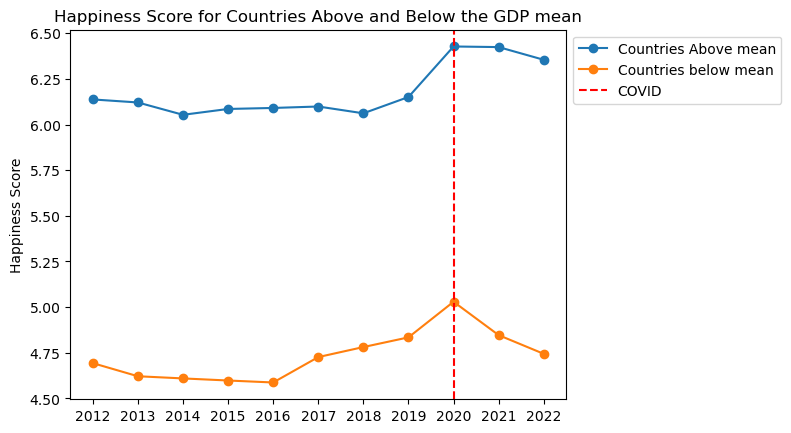

In [184]:
#plot trajectory of happiness score for coutnries above and below the gdp mean 

plt.plot(summary_above_gdp.index, summary_above_gdp["Happiness Score"], marker="o")
plt.plot(summary_below_gdp.index, summary_below_gdp["Happiness Score"], marker="o")
plt.xticks(summary_above_gdp.index)
plt.axvline(2020, color="red", linestyle="--", label="COVID")
plt.title("Happiness Score for Countries Above and Below the GDP mean") 
plt.ylabel("Happiness Score")
plt.legend(["Countries Above mean", "Countries below mean", "COVID"], loc="upper left", bbox_to_anchor=(1, 1))
plt.savefig("../Images/below_above_happy_score.png")

plt.show()

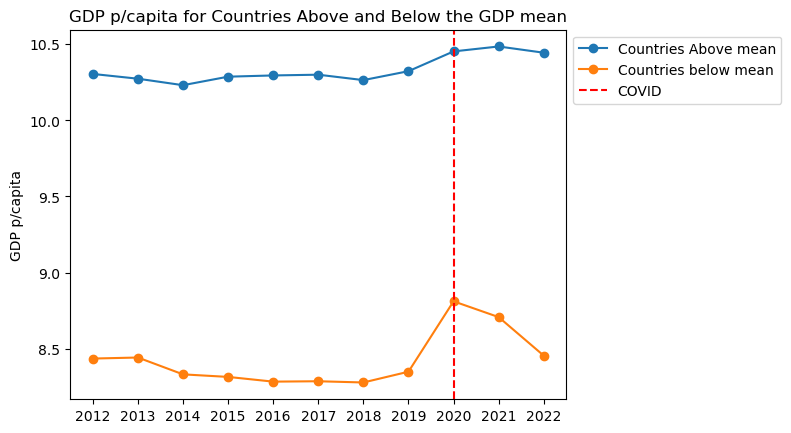

In [183]:
#plot trajectory of GDP for coutnries above and below the gdp mean 

plt.plot(summary_above_gdp.index, summary_above_gdp["GDP p/capita"], marker="o")
plt.plot(summary_below_gdp.index, summary_below_gdp["GDP p/capita"], marker="o")
plt.xticks(summary_above_gdp.index)
plt.axvline(2020, color="red", linestyle="--", label="COVID")
plt.title("GDP p/capita for Countries Above and Below the GDP mean") 
plt.ylabel("GDP p/capita")
plt.legend(["Countries Above mean", "Countries below mean", "COVID"], loc="upper left", bbox_to_anchor=(1, 1))
plt.savefig("../Images/below_above_GDP.png")

plt.show()

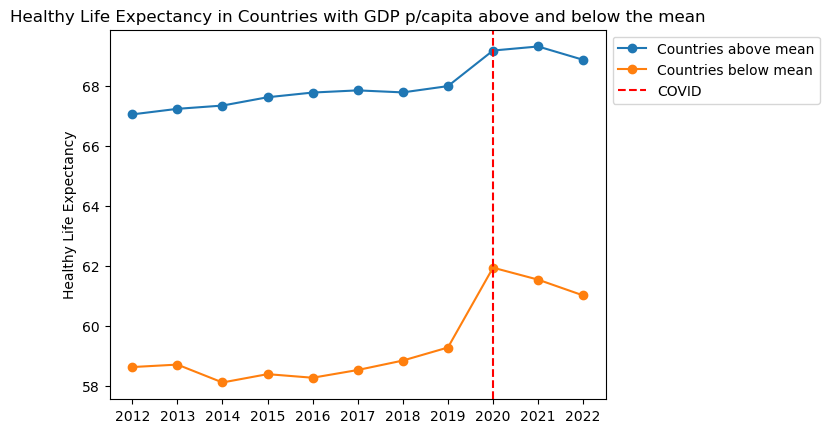

In [182]:
#plot trajectory of GDP for coutnries above and below the gdp mean

plt.plot(summary_above_gdp.index, summary_above_gdp["Healthy Life Expectancy"], marker="o")
plt.plot(summary_below_gdp.index, summary_below_gdp["Healthy Life Expectancy"], marker="o")
plt.xticks(summary_above_gdp.index)
plt.axvline(2020, color="red", linestyle="--", label="COVID")
plt.title("Healthy Life Expectancy in Countries with GDP p/capita above and below the mean") 
plt.ylabel("Healthy Life Expectancy")
plt.legend(["Countries above mean", "Countries below mean", "COVID"], loc="upper left", bbox_to_anchor=(1, 1))
plt.savefig("../Images/below_above_life_expec.png")

plt.show()


In [ ]:
# read the depression file 
depression_df = pd.read_csv("../Resources/depression-rates-by-country-2023.csv")
depression_df